<a href="https://colab.research.google.com/github/Krish6115/MLLab/blob/main/Lab2/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Lab Session Data(IRCTC Stock Price).csv to Lab Session Data(IRCTC Stock Price) (1).csv
Saving Lab Session Data(thyroid0387_UCI).csv to Lab Session Data(thyroid0387_UCI) (1).csv


[A1] Dimensionality: 3
[A1] Number of vectors: 4
[A1] Rank(A): 3
[A1] Prices (X): [109.36  22.77  51.7 ]
[A2] Logistic Regression accuracy: 100.00%
[A2] Predicted classes (1=RICH, 0=POOR): [1, 0, 0, 1]


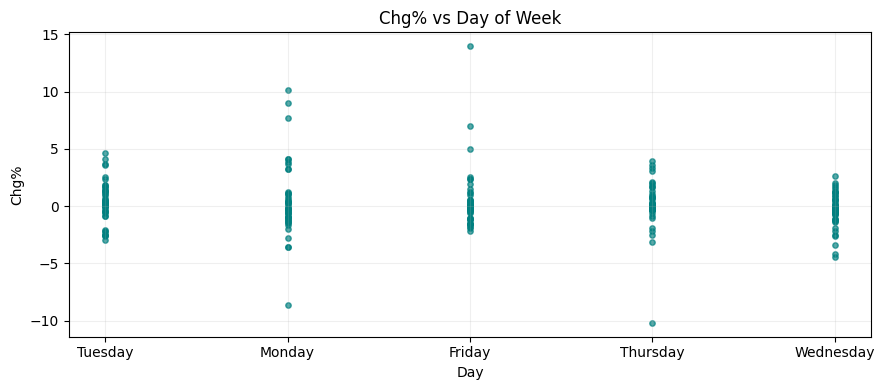

[A3] Mean Price (population): 1560.663453815261
[A3] Variance Price: 58732.365352539186
[A3] Wednesday mean: 1550.706 | Δ: -9.957453815261033
[A3] April mean: 1698.9526315789474 | Δ: 138.28917776368644
[A3] P(loss): 0.4979919678714859
[A3] P(profit | Wednesday): 0.42


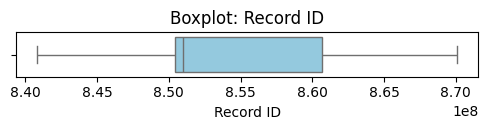

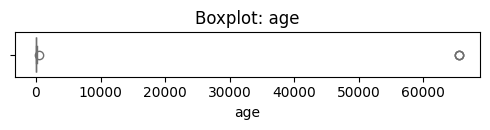

[A4] #Categorical columns: 29
[A4] Numeric columns: ['Record ID', 'age']
[A4] Encoding suggestions (sample): {'sex': 'OneHot (nominal)', 'on thyroxine': 'OneHot (nominal)', 'query on thyroxine': 'OneHot (nominal)', 'on antithyroid medication': 'OneHot (nominal)', 'sick': 'OneHot (nominal)'}
[A4] Missing counts (head): {'Record ID': 0, 'age': 0, 'sex': 0, 'on thyroxine': 0, 'query on thyroxine': 0, 'on antithyroid medication': 0, 'sick': 0, 'pregnant': 0}
[A5] f11,f00,f10,f01: 1 16 1 2
[A5] JC: 0.25 SMC: 0.85
[A5] #Used binary columns: 20
[A6] Cosine similarity (row1 vs row2, numeric-only): 1.0000


/tmp/ipython-input-3912522084.py:161: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  v1 = row1[binary_cols].replace({'f': 0, 't': 1, '?': np.nan})
/tmp/ipython-input-3912522084.py:162: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  v2 = row2[binary_cols].replace({'f': 0, 't': 1, '?': np.nan})
/tmp/ipython-input-3912522084.py:203: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the futur

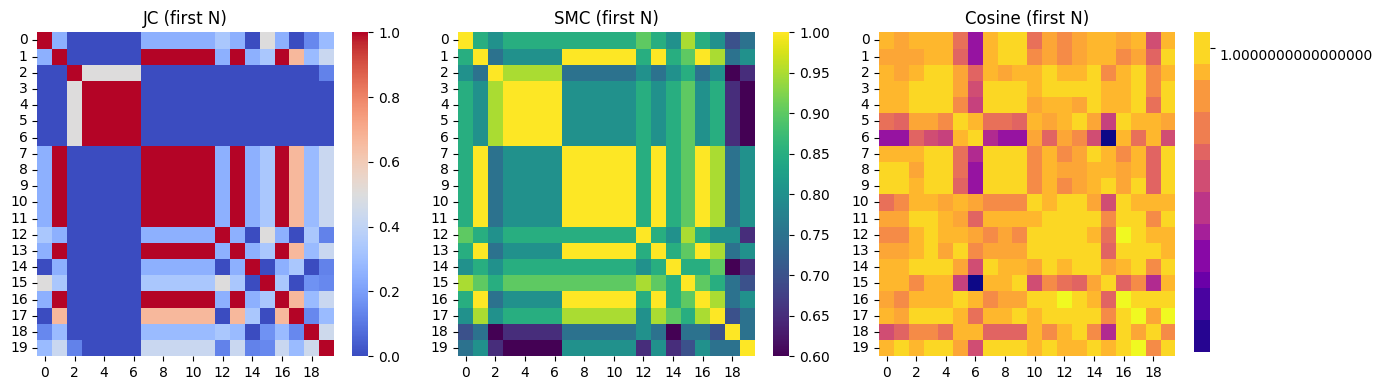

[A7] Matrices shapes - JC: (20, 20) SMC: (20, 20) COS: (20, 20)
[A8] Imputation done. Any NaNs left? -> False
[A9] Min-Max scaled numeric preview:
       Record ID       age
0  0.000000e+00  0.000427
1  3.410871e-08  0.000427
2  9.891527e-07  0.000610
3  6.934301e-05  0.000534
4  6.937712e-05  0.000473


In [ ]:
#Lab Session 02
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Tuple, List, Dict
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy.linalg import matrix_rank
from numpy import dot
from numpy.linalg import norm
from sklearn.preprocessing import MinMaxScaler

# A1. Linear Algebra utilities
def a1_linear_system(A: np.ndarray, C: np.ndarray) -> Dict[str, object]:
    # A is m x n: m observations (vectors), n features
    m, n = A.shape
    dim_vector_space = n
    num_vectors = m
    rankA = matrix_rank(A)
    X = np.linalg.pinv(A) @ C  #using pseudo inv least-squares solution
    return {
        "dimensionality": dim_vector_space,
        "num_vectors": num_vectors,
        "rank": rankA,
        "X": X
    }

# A2. Classification: RICH(>threshold=200) vs POOR using Logistic Regression
def a2_rich_poor_classifier(X: np.ndarray, payments: np.ndarray, threshold: float = 200.0) -> Dict[str, object]:
    y = (payments > threshold).astype(int)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred_test)
    y_pred_all = clf.predict(X)
    return {
        "accuracy": acc,
        "pred_all": y_pred_all,
        "labels": y
    }

# Helper: clean numeric strings (e.g., "2,081.85" or "0.20%")
def _to_float(series: pd.Series, remove_chars: List[str]) -> pd.Series:
    s = series.astype(str)
    for ch in remove_chars:
        s = s.str.replace(ch, "", regex=False)
    return pd.to_numeric(s, errors="coerce")

# A3. IRCTC Stock analytics and plot
def a3_irctc_stats_plot(csv_path: str) -> Dict[str, object]:
    df = pd.read_csv(csv_path)
    df.columns = df.columns.str.strip()

    # Parse dates and get weekday names
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
    df["DayName"] = df["Date"].dt.day_name()

    # Clean numeric columns
    price = _to_float(df["Price"], [","])
    chg = _to_float(df["Chg%"], ["%"])

    # Population stats
    price_clean = price.dropna()
    pop_mean = statistics.mean(price_clean)
    pop_var = statistics.variance(price_clean)

    # Wednesday sample mean
    wed_mask = (df["DayName"] == "Wednesday") & price.notna()
    wed_mean = statistics.mean(price[wed_mask]) if wed_mask.any() else float("nan")

    # April mean
    apr_mask = (df["Date"].dt.month == 4) & price.notna() #na means missing
    apr_mean = statistics.mean(price[apr_mask]) if apr_mask.any() else float("nan")

    # Probabilities
    chg_clean = chg.dropna() #drop missing changes
    prob_loss = (chg_clean < 0).mean()

    # P(profit | Wednesday)
    df_chg_aligned = df.loc[chg_clean.index]
    wed_chg = chg_clean[df_chg_aligned["DayName"] == "Wednesday"]
    prob_profit_wed = (wed_chg > 0).mean() if len(wed_chg) else float("nan")

    # Scatter plot Chg% vs Day of week
    plt.figure(figsize=(9, 4))
    plt.scatter(df_chg_aligned["DayName"], chg_clean, s=15, alpha=0.7, color="teal")
    plt.title("Chg% vs Day of Week")
    plt.xlabel("Day")
    plt.ylabel("Chg%")
    plt.grid(True, alpha=0.2)
    plt.tight_layout()
    plt.show()

    return {
        "population_mean_price": pop_mean,
        "population_variance_price": pop_var,
        "wednesday_mean_price": wed_mean,
        "april_mean_price": apr_mean,
        "prob_loss": prob_loss,
        "prob_profit_given_wed": prob_profit_wed
    }

# A4. Thyroid data exploration
def a4_thyroid_explore(csv_path: str) -> Dict[str, object]:
    df = pd.read_csv(csv_path)

    cat_cols = df.select_dtypes(include=["object"]).columns.tolist() #categorical
    num_cols = df.select_dtypes(include="number").columns.tolist() #numeric

    #label encode if looks ordinal, else one-hot
    encoding_suggestion = {}
    for col in cat_cols:
        uniq = df[col].dropna().astype(str).str.lower().unique().tolist()
        if {"low", "high"}.issubset(set(uniq)):
            encoding_suggestion[col] = "LabelEncoding (ordinal)"
        else:
            encoding_suggestion[col] = "OneHot (nominal)"

    numeric_range = {col: (float(df[col].min()), float(df[col].max())) for col in num_cols}
    numeric_stats = {col: {"mean": float(df[col].mean()), "std": float(df[col].std())} for col in num_cols}

    #Missing values
    missing = df.isna().sum().to_dict()

    # Outlier boxplots for numeric columns
    if num_cols:
        for col in num_cols:
            plt.figure(figsize=(5, 1.4))
            sns.boxplot(x=df[col], color="skyblue")
            plt.title(f"Boxplot: {col}")
            plt.tight_layout()
            plt.show()

    return {
        "categorical_columns": cat_cols,
        "numeric_columns": num_cols,
        "encoding_suggestion": encoding_suggestion,
        "numeric_range": numeric_range,
        "missing_counts": missing,
        "numeric_stats": numeric_stats
    }

# A5. Binary similarity (JC & SMC) between first two rows
def a5_binary_similarity(csv_path: str) -> Dict[str, object]:
    df = pd.read_csv(csv_path)
    row1 = df.iloc[0]
    row2 = df.iloc[1]

    # detect binary columns
    binary_cols = []
    for col in df.columns:
        vals = set(df[col].dropna().unique().tolist())
        if vals.issubset({'f', 't', '?'}) or vals.issubset({0, 1}):
            binary_cols.append(col)

    v1 = row1[binary_cols].replace({'f': 0, 't': 1, '?': np.nan})
    v2 = row2[binary_cols].replace({'f': 0, 't': 1, '?': np.nan})

    mask = (~v1.isna()) & (~v2.isna())
    v1 = v1[mask].astype(int)
    v2 = v2[mask].astype(int)

    f11 = int(((v1 == 1) & (v2 == 1)).sum())
    f00 = int(((v1 == 0) & (v2 == 0)).sum())
    f10 = int(((v1 == 1) & (v2 == 0)).sum())
    f01 = int(((v1 == 0) & (v2 == 1)).sum())

    jc = f11 / (f11 + f10 + f01) if (f11 + f10 + f01) else 0.0
    smc = (f11 + f00) / (f11 + f00 + f10 + f01) if (f11 + f00 + f10 + f01) else 0.0

    return {
        "f11": f11, "f00": f00, "f10": f10, "f01": f01,
        "JC": jc, "SMC": smc,
        "used_binary_columns": binary_cols
    }

# A6. Cosine similarity between first two observations (numeric only)
def a6_cosine_similarity(csv_path: str) -> float:
    df = pd.read_csv(csv_path)
    df_num = df.select_dtypes(include="number")
    if len(df_num) < 2 or df_num.shape[1] == 0:
        return float("nan")
    v1 = df_num.iloc[0].values
    v2 = df_num.iloc[1].values
    denom = norm(v1) * norm(v2)
    return float(dot(v1, v2) / denom) if denom else 0.0

# A7. Heatmaps for JC, SMC, Cosine among first N observations
def a7_similarity_heatmaps(csv_path: str, first_n: int = 20) -> Dict[str, np.ndarray]:
    df = pd.read_csv(csv_path)

    # Binary columns (f/t/? or 0/1)
    binary_cols = []
    for col in df.columns:
        vals = set(df[col].dropna().unique().tolist())
        if vals.issubset({'f', 't', '?'}) or vals.issubset({0, 1}):
            binary_cols.append(col)
    bin_df = df[binary_cols].replace({'f': 0, 't': 1, '?': np.nan}).iloc[:first_n]
    bin_df = bin_df.dropna(axis=1, how="any")  # keep columns without '?' within first N rows

    # Numeric slice
    num_df = df.select_dtypes(include="number").iloc[:first_n]
    n = len(bin_df)

    jc_mat = np.zeros((n, n))
    smc_mat = np.zeros((n, n))
    cos_mat = np.zeros((first_n, first_n))

    # JC & SMC
    for i in range(n):
        vi = bin_df.iloc[i].astype(int)
        for j in range(n):
            vj = bin_df.iloc[j].astype(int)
            f11 = int(((vi == 1) & (vj == 1)).sum())
            f00 = int(((vi == 0) & (vj == 0)).sum())
            f10 = int(((vi == 1) & (vj == 0)).sum())
            f01 = int(((vi == 0) & (vj == 1)).sum())
            jc = f11 / (f11 + f10 + f01) if (f11 + f10 + f01) else 0.0
            smc = (f11 + f00) / (f11 + f00 + f10 + f01) if (f11 + f00 + f10 + f01) else 0.0
            jc_mat[i, j] = jc
            smc_mat[i, j] = smc

    # Cosine
    for i in range(first_n):
        vi = num_df.iloc[i].values if len(num_df) else np.array([])
        for j in range(first_n):
            vj = num_df.iloc[j].values if len(num_df) else np.array([])
            denom = (norm(vi) * norm(vj)) if len(vi) and len(vj) else 0.0
            cos = float(dot(vi, vj) / denom) if denom else 0.0
            cos_mat[i, j] = cos

    # Plot heatmaps
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 3, 1)
    sns.heatmap(jc_mat, cmap="coolwarm", cbar=True)
    plt.title("JC (first N)")
    plt.subplot(1, 3, 2)
    sns.heatmap(smc_mat, cmap="viridis", cbar=True)
    plt.title("SMC (first N)")
    plt.subplot(1, 3, 3)
    sns.heatmap(cos_mat, cmap="plasma", cbar=True)
    plt.title("Cosine (first N)")
    plt.tight_layout()
    plt.show()

    return {"JC": jc_mat, "SMC": smc_mat, "COS": cos_mat}

# A8. Imputation (numeric: mean if |skew|<1 else median; categorical: mode)
# Note: fills only true NaNs, not '?' strings.
def a8_impute(csv_path: str) -> pd.DataFrame:
    df = pd.read_csv(csv_path)

    num_cols = df.select_dtypes(include="number").columns
    cat_cols = df.select_dtypes(include="object").columns

    for col in num_cols:
        if df[col].isna().sum() > 0:
            if abs(df[col].skew()) < 1:
                df[col] = df[col].fillna(df[col].mean())
            else:
                df[col] = df[col].fillna(df[col].median())

    for col in cat_cols:
        if df[col].isna().sum() > 0:
            df[col] = df[col].fillna(df[col].mode().iloc[0])

    return df

# A9. Min-Max normalization for numeric columns
def a9_normalize_minmax(df: pd.DataFrame) -> pd.DataFrame:
    num_cols = df.select_dtypes(include="number").columns.tolist()
    scaler = MinMaxScaler()
    scaled = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols, index=df.index)
    return scaled

# MAIN
if __name__ == "__main__":
    # A1:A (m x n) and C (m x 1)
    A = np.array([
        [2, 1, 0],
        [0, 1, 3],
        [1, 0, 1],
        [3, 2, 1]
    ], dtype=float)
    C = np.array([250, 180, 160, 420], dtype=float)

    a1 = a1_linear_system(A, C)
    print("[A1] Dimensionality:", a1["dimensionality"])
    print("[A1] Number of vectors:", a1["num_vectors"])
    print("[A1] Rank(A):", a1["rank"])
    print("[A1] Prices (X):", np.round(a1["X"], 2).ravel())

    # A2: Logistic Regression on RICH/POOR labels (threshold = 200)
    a2 = a2_rich_poor_classifier(A, C, threshold=200)
    print(f"[A2] Logistic Regression accuracy: {a2['accuracy']*100:.2f}%")
    print("[A2] Predicted classes (1=RICH, 0=POOR):", a2["pred_all"].tolist())

    # A3: IRCTC Stock analysis (ensure the CSV file is in the working directory)
    irctc_path = "Lab Session Data(IRCTC Stock Price).csv"
    a3 = a3_irctc_stats_plot(irctc_path)
    print("[A3] Mean Price (population):", a3["population_mean_price"])
    print("[A3] Variance Price:", a3["population_variance_price"])
    print("[A3] Wednesday mean:", a3["wednesday_mean_price"], "| Δ:",
          a3["wednesday_mean_price"] - a3["population_mean_price"])
    print("[A3] April mean:", a3["april_mean_price"], "| Δ:",
          a3["april_mean_price"] - a3["population_mean_price"])
    print("[A3] P(loss):", a3["prob_loss"])
    print("[A3] P(profit | Wednesday):", a3["prob_profit_given_wed"])

    # A4: Thyroid data exploration
    thyroid_path = "Lab Session Data(thyroid0387_UCI).csv"
    a4 = a4_thyroid_explore(thyroid_path)
    print("[A4] #Categorical columns:", len(a4["categorical_columns"]))
    print("[A4] Numeric columns:", a4["numeric_columns"])
    # show a few suggestions
    ks = list(a4["encoding_suggestion"])[:5]
    print("[A4] Encoding suggestions (sample):", {k: a4["encoding_suggestion"][k] for k in ks})
    print("[A4] Missing counts (head):", dict(list(a4["missing_counts"].items())[:8]))

    # A5: Binary similarity between first two rows
    a5 = a5_binary_similarity(thyroid_path)
    print("[A5] f11,f00,f10,f01:", a5["f11"], a5["f00"], a5["f10"], a5["f01"])
    print("[A5] JC:", round(a5["JC"], 4), "SMC:", round(a5["SMC"], 4))
    print("[A5] #Used binary columns:", len(a5["used_binary_columns"]))

    # A6: Cosine similarity (numeric-only) between first two observations
    cos = a6_cosine_similarity(thyroid_path)
    print(f"[A6] Cosine similarity (row1 vs row2, numeric-only): {cos:.4f}")

    # A7: Heatmaps for first 20 observations
    a7 = a7_similarity_heatmaps(thyroid_path, first_n=20)
    print("[A7] Matrices shapes - JC:", a7["JC"].shape, "SMC:", a7["SMC"].shape, "COS:", a7["COS"].shape)

    # A8 & A9: Imputation and Scaling
    imputed_df = a8_impute(thyroid_path)
    any_nans_left = imputed_df.isna().sum().sum() > 0
    print("[A8] Imputation done. Any NaNs left? ->", any_nans_left)
    scaled_num = a9_normalize_minmax(imputed_df)
    print("[A9] Min-Max scaled numeric preview:\n", scaled_num.head())
